# ANALYZING STACK OVERFLOW SURVEY DATA

## QUESTIONS

##### 1) COUNTRIES WITH MOST THE NUMBER OF STACK OVERFLOW USERS.
##### 2) JOB SATISFACTION AND CAREER SATISFACTION OF COUNTRIES USING STACKOVERFLOW THE MOST ?
##### 3) IS PROGRAMING AS HOBBY  HEPLS TO INCREASE YOUR SALARY?

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
df=pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preprocessing

In [206]:
df.dtypes
#Filling NaN values in Salary column by replacing it with mean salary.
df.dropna(subset=['Salary'])
#Filling NaN values in JobSatisfaction column
js=df['JobSatisfaction'].mean()
df['JobSatisfaction'].fillna(js, inplace = True) 
df['Salary']

0         58341.398571
1         58341.398571
2        113750.000000
3         58341.398571
4         58341.398571
             ...      
19097     58341.398571
19098     58341.398571
19099     58341.398571
19100    110000.000000
19101     58341.398571
Name: Salary, Length: 19102, dtype: float64

#### ANSWER 1

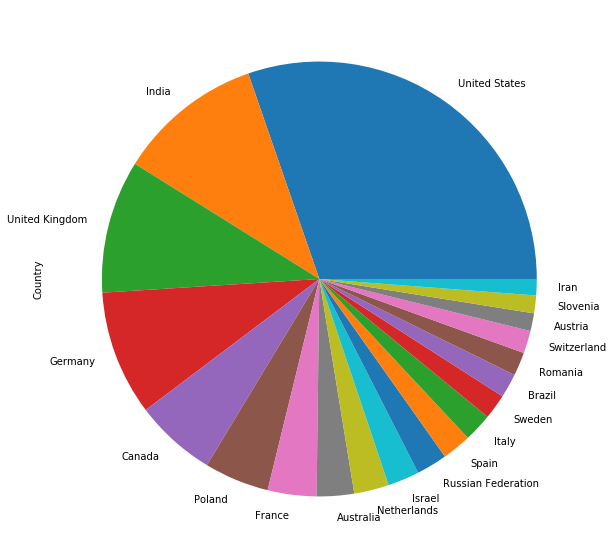

In [89]:
df['Country'].value_counts()[0:20].plot(kind='pie',figsize=(12,10))

### CONCLUSION :
From the pie chart, it is clear that most number of stackoverflow users are from **UNITED STATES** , followed by **INDIA**, **UNITED KINGDOM** and so on.

I have shown top 20 countries using stackoverflow the most.

#### ANSWER 2

In [90]:
top_5=['United States','India','United Kingdom','Germany','Canada']

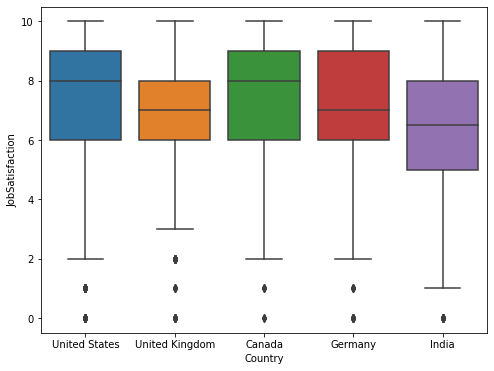

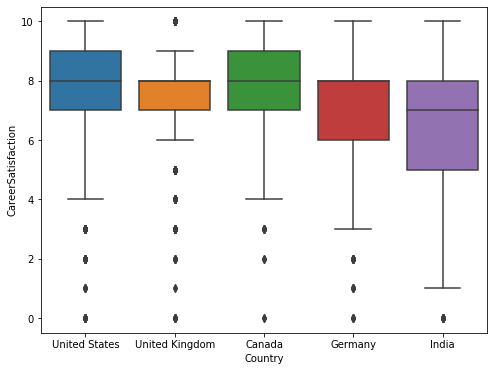

In [92]:
df1 = df[df['Country'].map(lambda x: x in countries_interest_in)].reset_index()
fig = plt.figure(figsize=(8,6))
sns.boxplot(x="Country", y="JobSatisfaction", data=df1)
fig = plt.figure(figsize=(8,6))
sns.boxplot(x="Country", y="CareerSatisfaction", data=df1)

### CONCLUSION :
From the box plot, it is clear that Indians has less Job satisfaction as compared to other top 5 countries using stack overflow the most.The most satisfied countries in terms of job satisfaction are United States and Canada.

In terms of career satisfaction, United States and Canada are Satisfied more than any country.

#### ANSWER 3

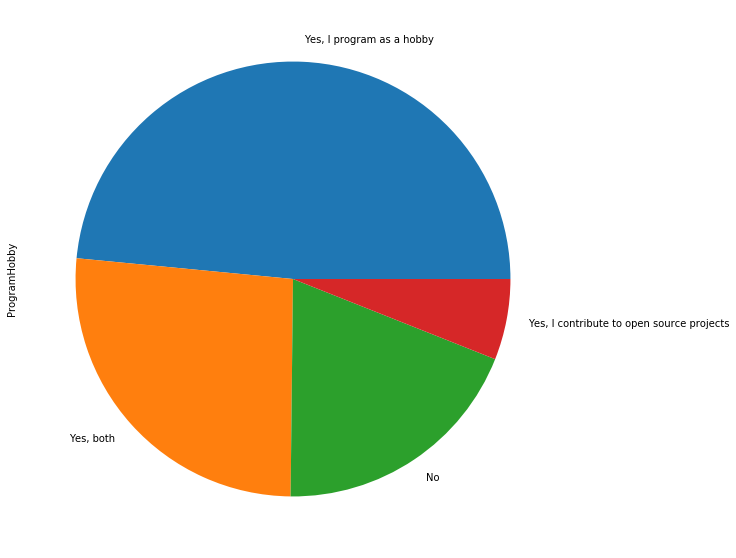

In [196]:
#PLOTTING PIE CHART FOR USERS , WHAT THEY OF PROGRAMING
df['ProgramHobby'].value_counts()[0:20].plot(kind='pie',figsize=(12,10))

In [197]:
# AVERAGE SALARY OF USER WHO HAS NO PROGRAMING HOBBY
df2=df[df['ProgramHobby']=='No']
NO=df2['Salary'].mean()

In [198]:
# AVERAGE SALARY OF USER WHO HAS PROGRAMING HOBBY
df3=df[df['ProgramHobby']=='Yes, I program as a hobby']
YES=df3['Salary'].mean()

In [199]:
# AVERAGE SALARY OF USER WHO HAS PROGRAMING HOBBY
df4=df[df['ProgramHobby']=='Yes, I contribute to open source projects']
OS=df4['Salary'].mean()


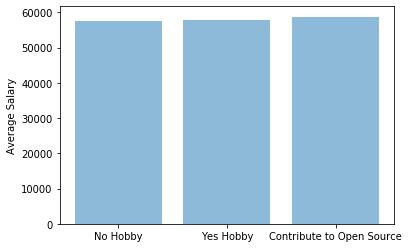

In [207]:
#PLOTTING BAR CHART FOR REPRESENTING THE DIFFERENCE IN SALARY.
objects=('No Hobby','Yes Hobby','Contribute to Open Source')
y_pos = np.arange(len(objects))
Mean = [NO,YES,OS]
plt.bar(y_pos, Mean, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Salary')
plt.show()

### CONCLUSION :
From the bar chart , it seems that user who contribute to open source has a little more salary than other users but the differece is not too much. 